### Data Exploration and Preprocessing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
#check shape of dataset

df.shape

(3276, 10)

In [5]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [6]:
# Summary statistics
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
# Data types of each column
df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


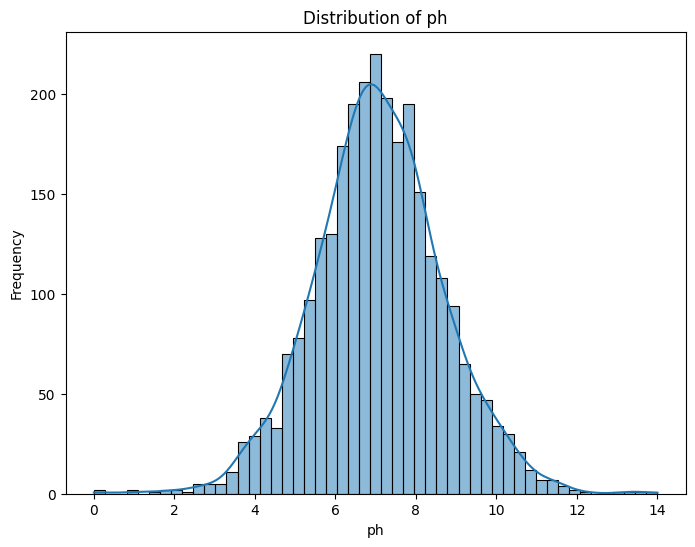

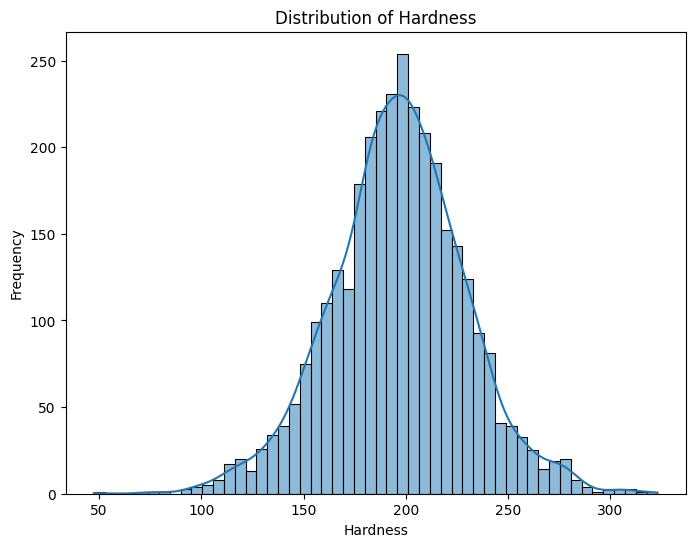

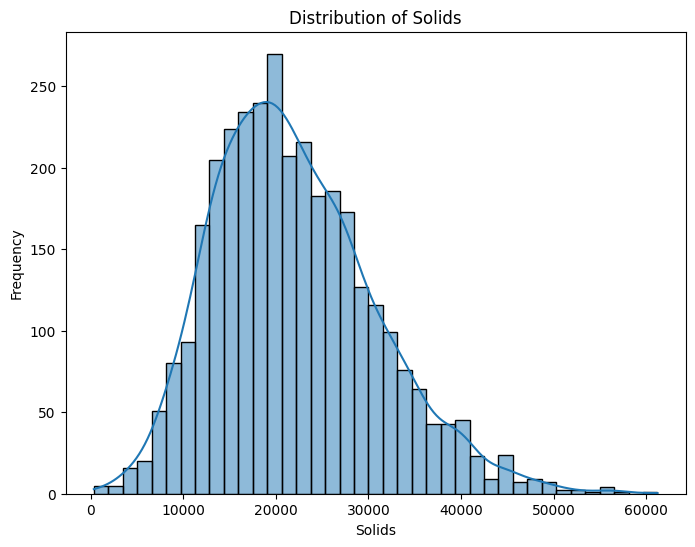

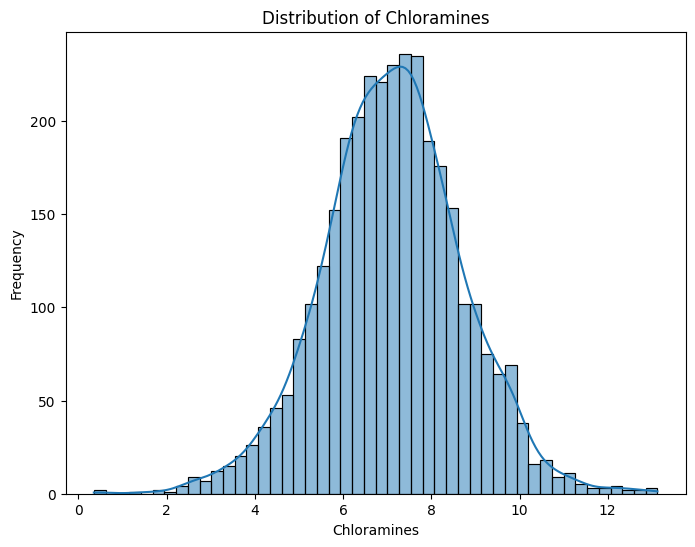

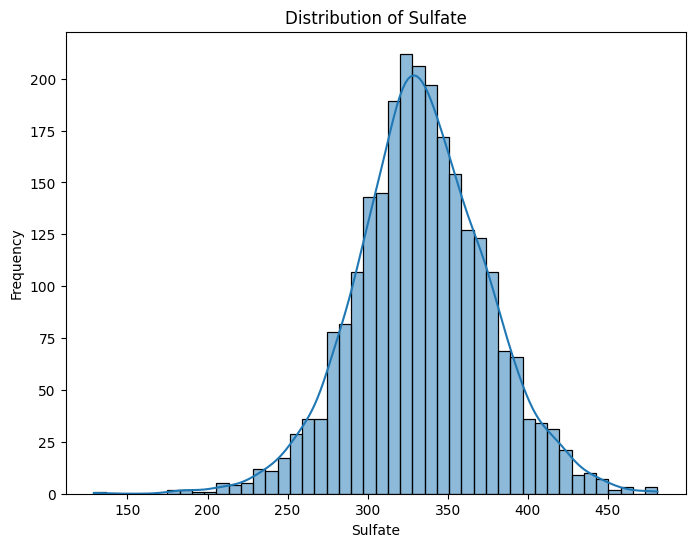

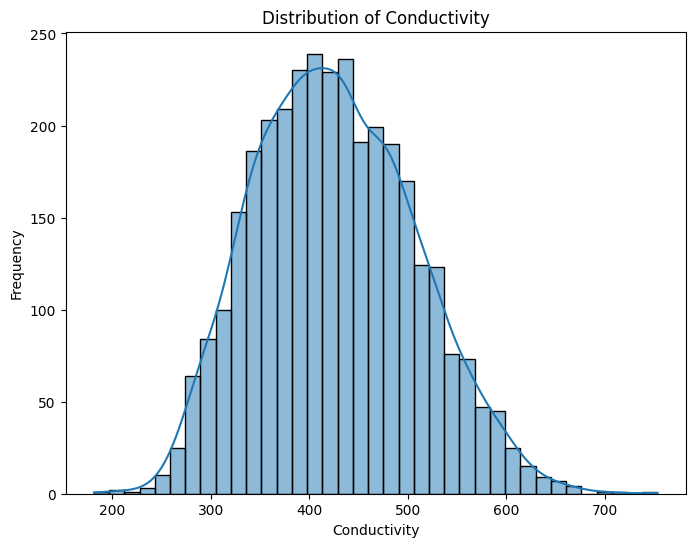

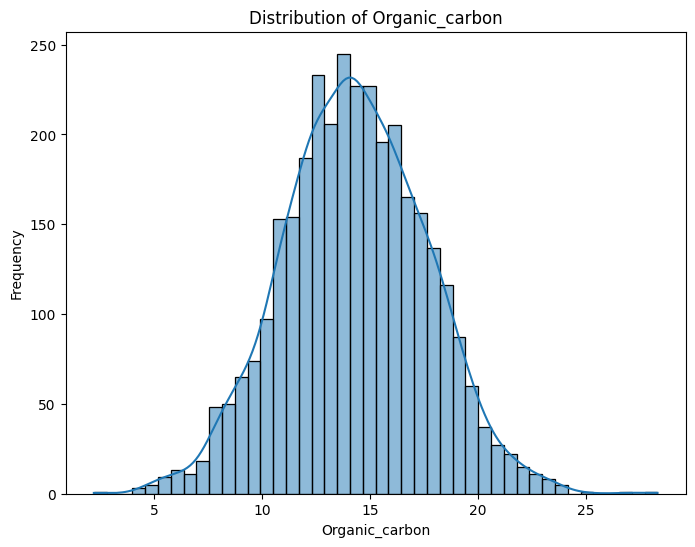

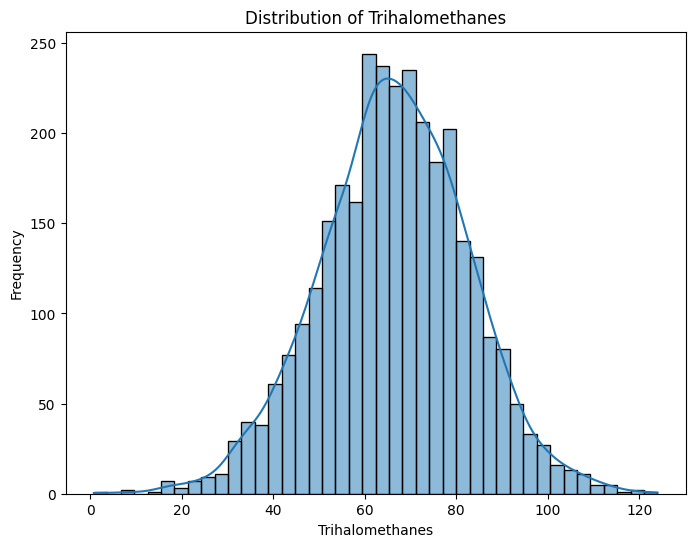

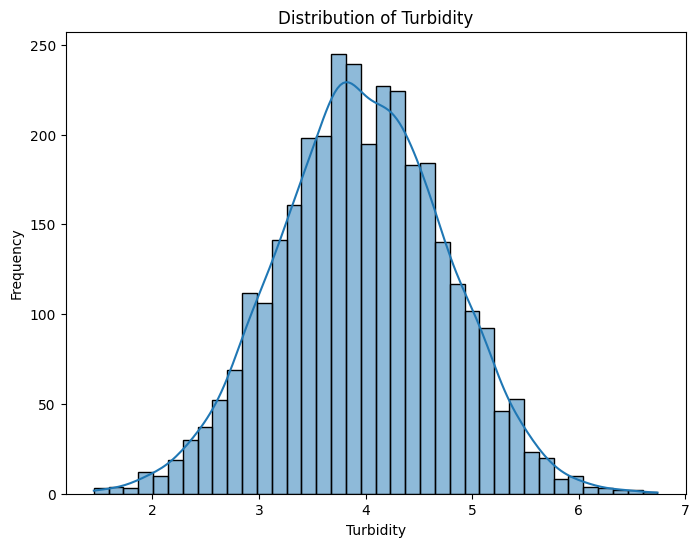

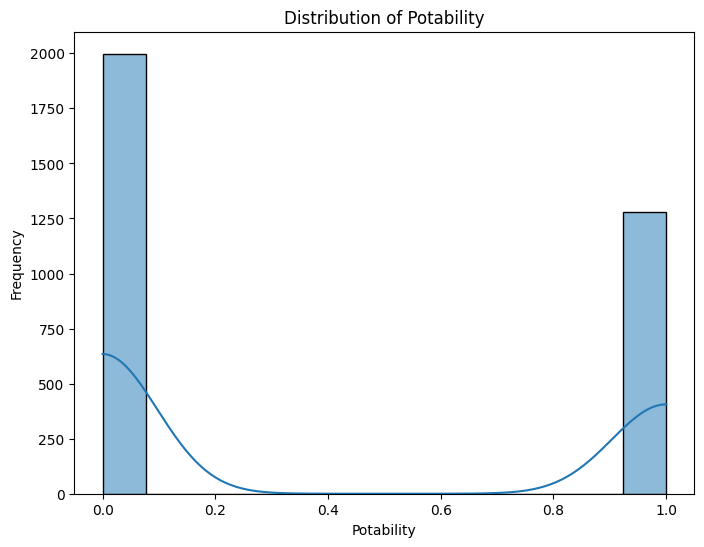

In [8]:
# Check the distribution of each column using histograms
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

In [9]:
for column in df.columns:
  if df[column].isnull().any():
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

<ipython-input-9-db16d2e429f1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


In [10]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


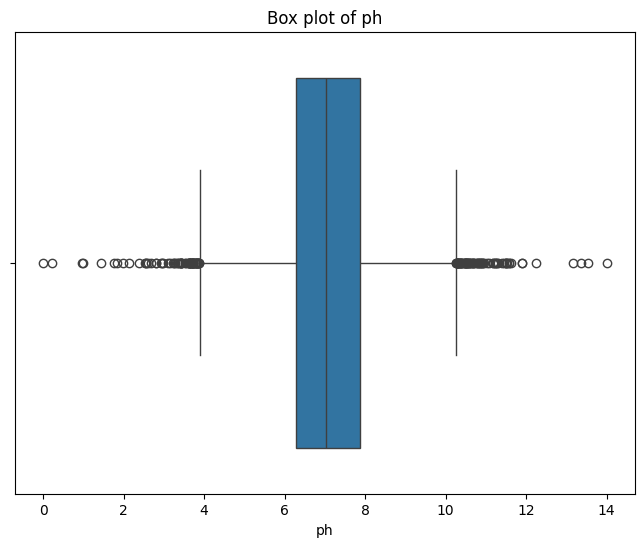

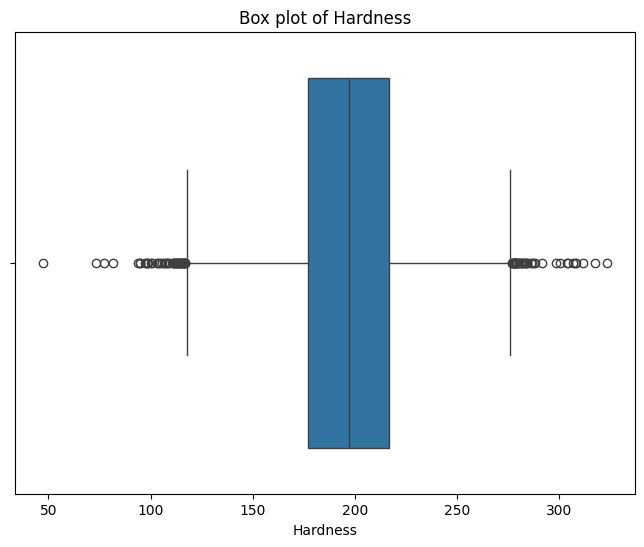

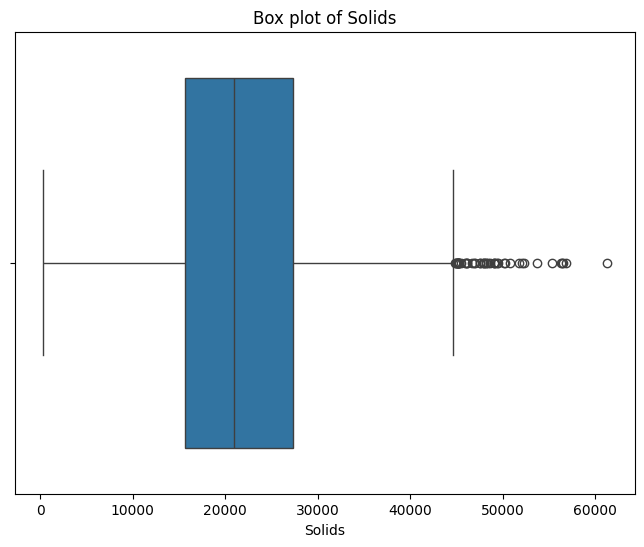

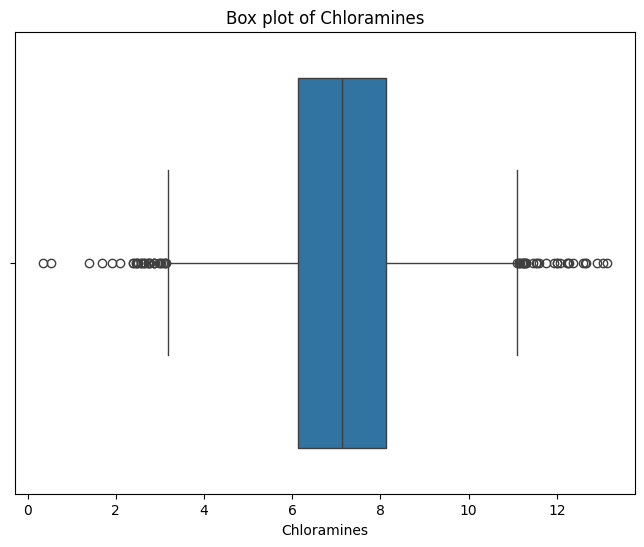

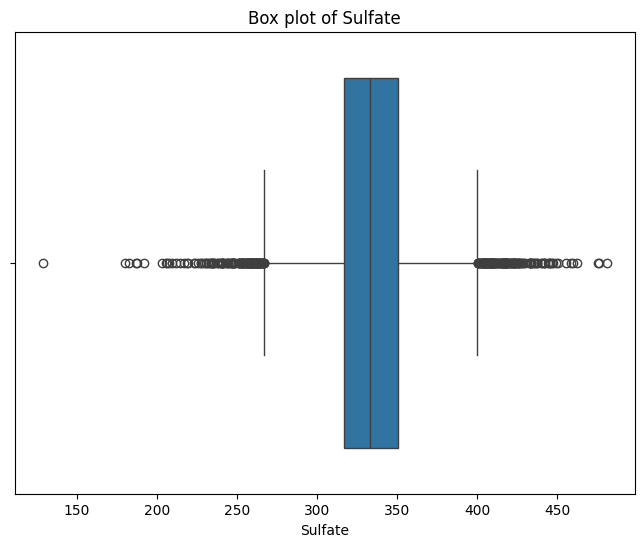

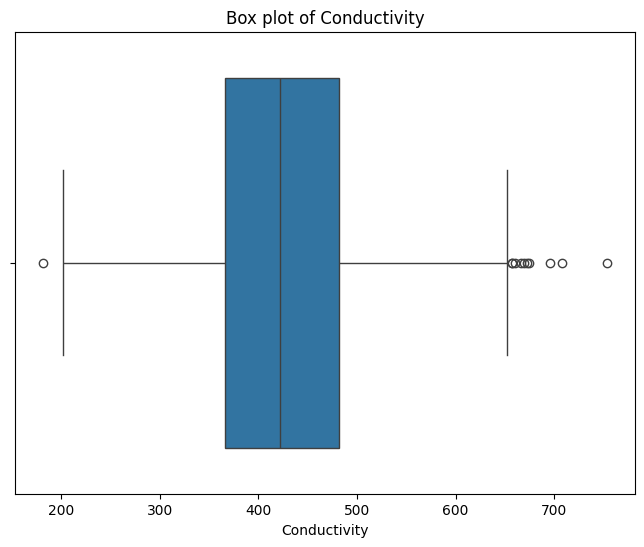

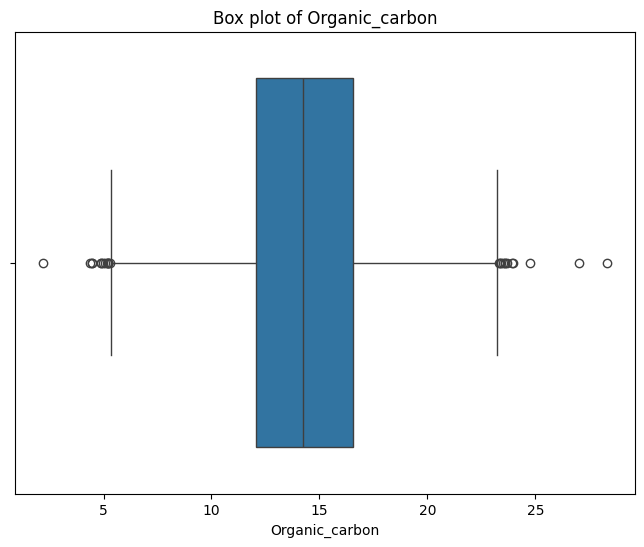

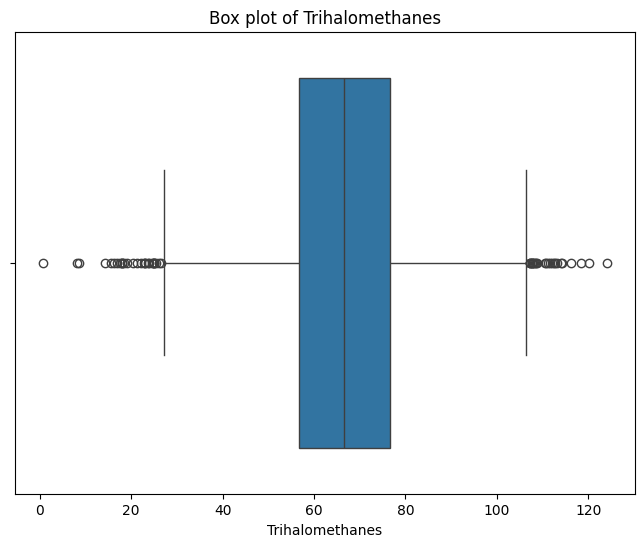

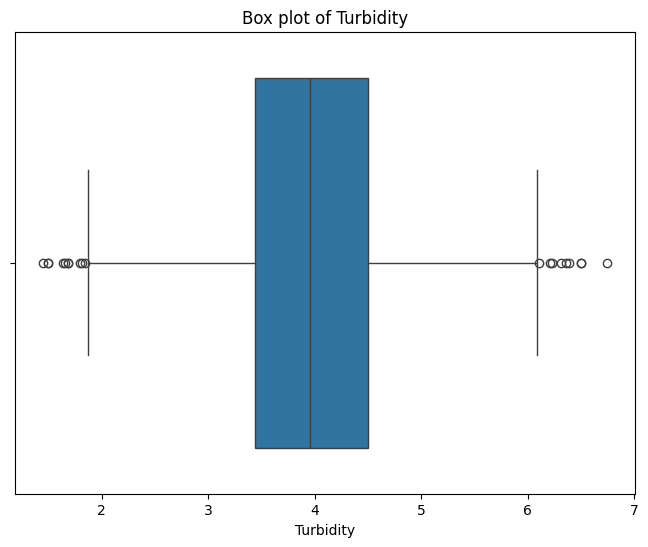

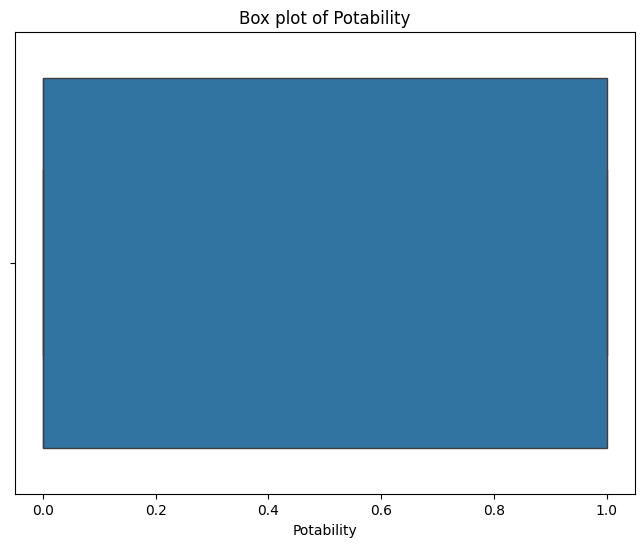

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.407478     3.966786     0.390110  
std       80.824064        3.308162        15.769958     0.780382     0.487849  


In [11]:
# box plots to visualize the distribution and identify outliers
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Box plot of {column}')
  plt.show()

print(df.describe())

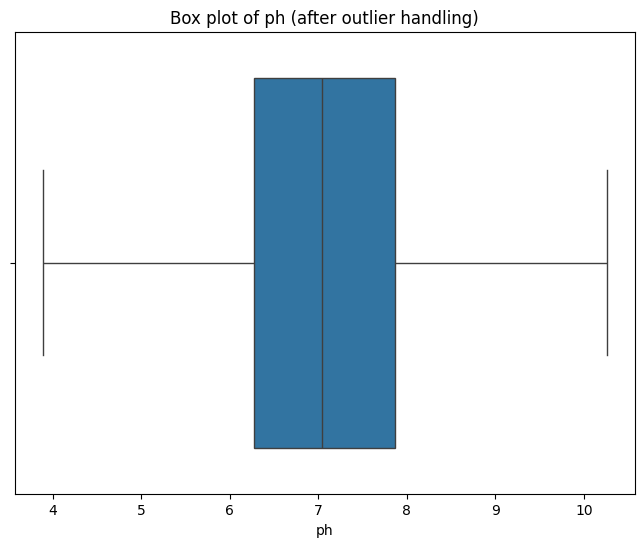

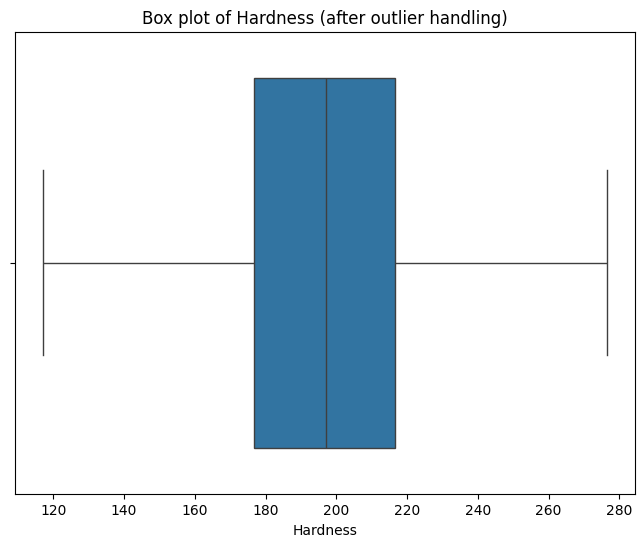

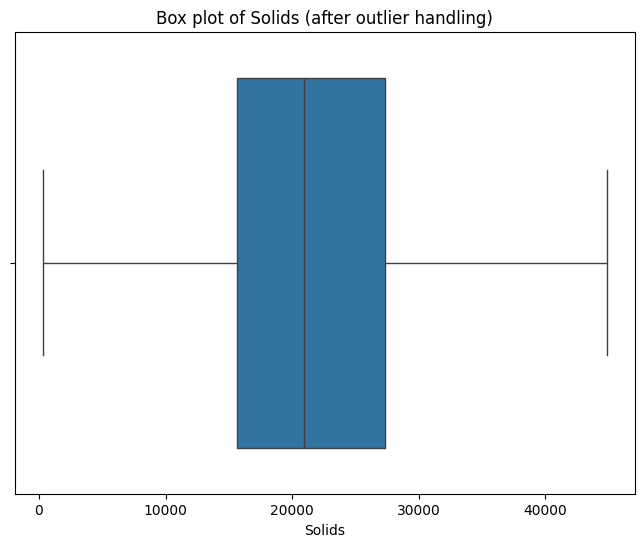

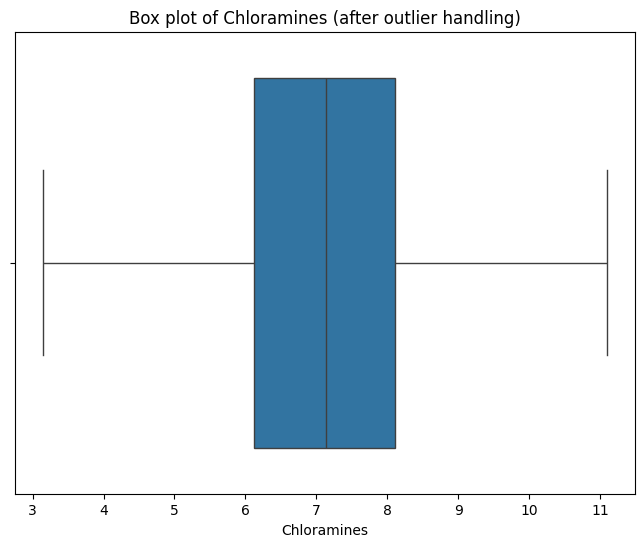

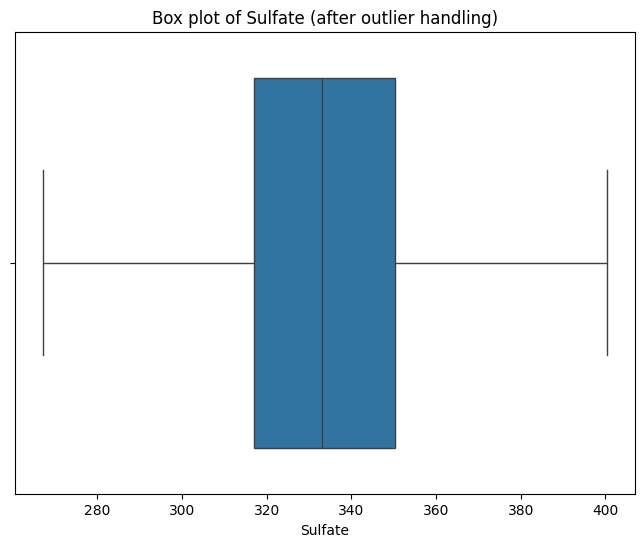

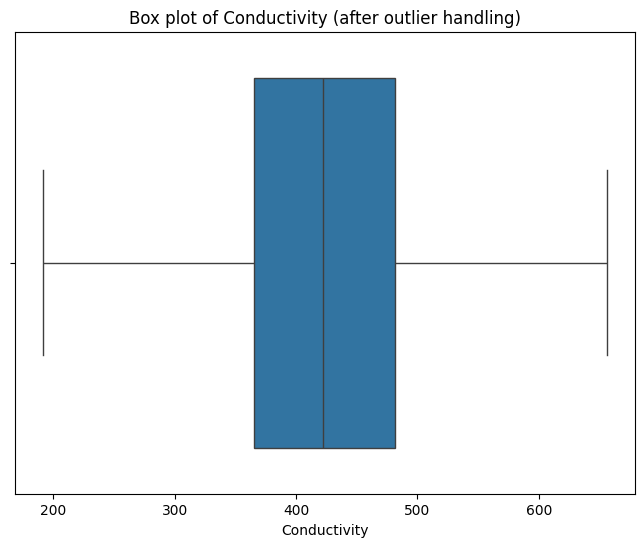

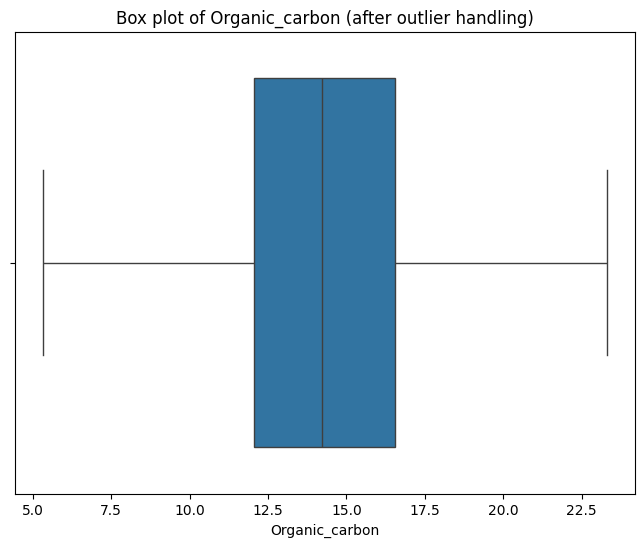

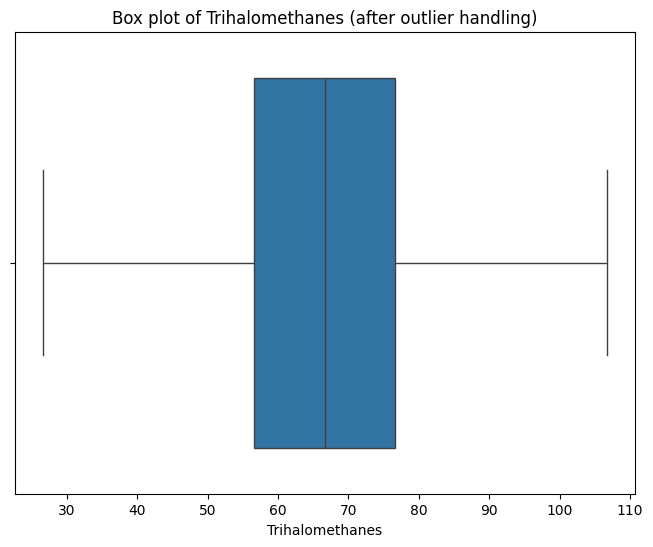

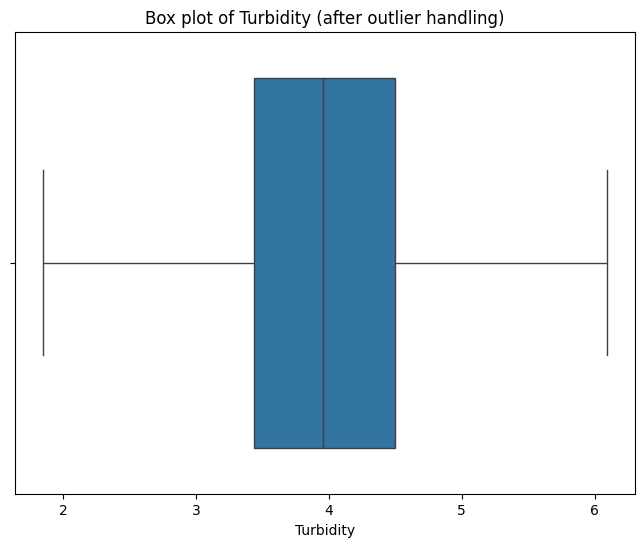

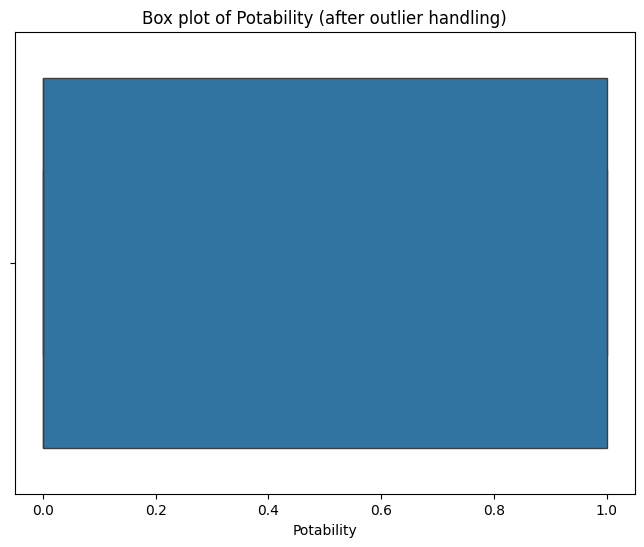

In [12]:
# Identify outliers using IQR (Interquartile Range)
for column in df.columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the nearest bound
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Recheck the distribution after handling outliers
for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Box plot of {column} (after outlier handling)')
  plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Potability', axis=1)
y = df['Potability']

scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(df)

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

print(scaled_df.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.026484  0.265461 -0.135691     0.115564  1.098554      1.715401   
1 -2.304373 -2.091993 -0.387249    -0.315144 -0.017243      2.070162   
2  0.742334  0.869786 -0.238325     1.395235 -0.017243     -0.093403   
3  0.899837  0.561689  0.007136     0.607257  0.732414     -0.780410   
4  1.461021 -0.477657 -0.463030    -0.372561 -0.739361     -0.344116   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       -1.187299         1.327709  -1.292657   -0.799775  
1        0.272685        -0.652415   0.687944   -0.799775  
2        0.786278        -0.000744  -1.173116   -0.799775  
3        1.263149         2.189888   0.852978   -0.799775  
4       -0.828861        -2.223698   0.139720   -0.799775  


In [14]:
# Check skewness of all columns
for column in df.columns:
  skewness = df[column].skew()
  print(f"Skewness of {column}: {skewness}")

Skewness of ph: 0.054540803461411345
Skewness of Hardness: -0.024976969626310422
Skewness of Solids: 0.4845658510677537
Skewness of Chloramines: -0.017865040278755066
Skewness of Sulfate: 0.05555366003889906
Skewness of Conductivity: 0.2405724991998891
Skewness of Organic_carbon: 0.008748778491116443
Skewness of Trihalomethanes: -0.05179069429701881
Skewness of Turbidity: -0.014412805111749525
Skewness of Potability: 0.4507837491078628


In [15]:
# Apply transformations to handle skewness
for column in df.columns:
  skewness = df[column].skew()
  if abs(skewness) > 0.5:  # Consider columns with skewness greater than 0.5 as highly skewed
    if skewness > 0:
      df[column] = np.log1p(df[column])
    else:
      df[column] = np.exp(df[column])

# Check skewness after transformations
for column in df.columns:
  skewness = df[column].skew()
  print(f"Skewness of {column} (after transformation): {skewness}")

Skewness of ph (after transformation): 0.054540803461411345
Skewness of Hardness (after transformation): -0.024976969626310422
Skewness of Solids (after transformation): 0.4845658510677537
Skewness of Chloramines (after transformation): -0.017865040278755066
Skewness of Sulfate (after transformation): 0.05555366003889906
Skewness of Conductivity (after transformation): 0.2405724991998891
Skewness of Organic_carbon (after transformation): 0.008748778491116443
Skewness of Trihalomethanes (after transformation): -0.05179069429701881
Skewness of Turbidity (after transformation): -0.014412805111749525
Skewness of Potability (after transformation): 0.4507837491078628


###Feature Engineering


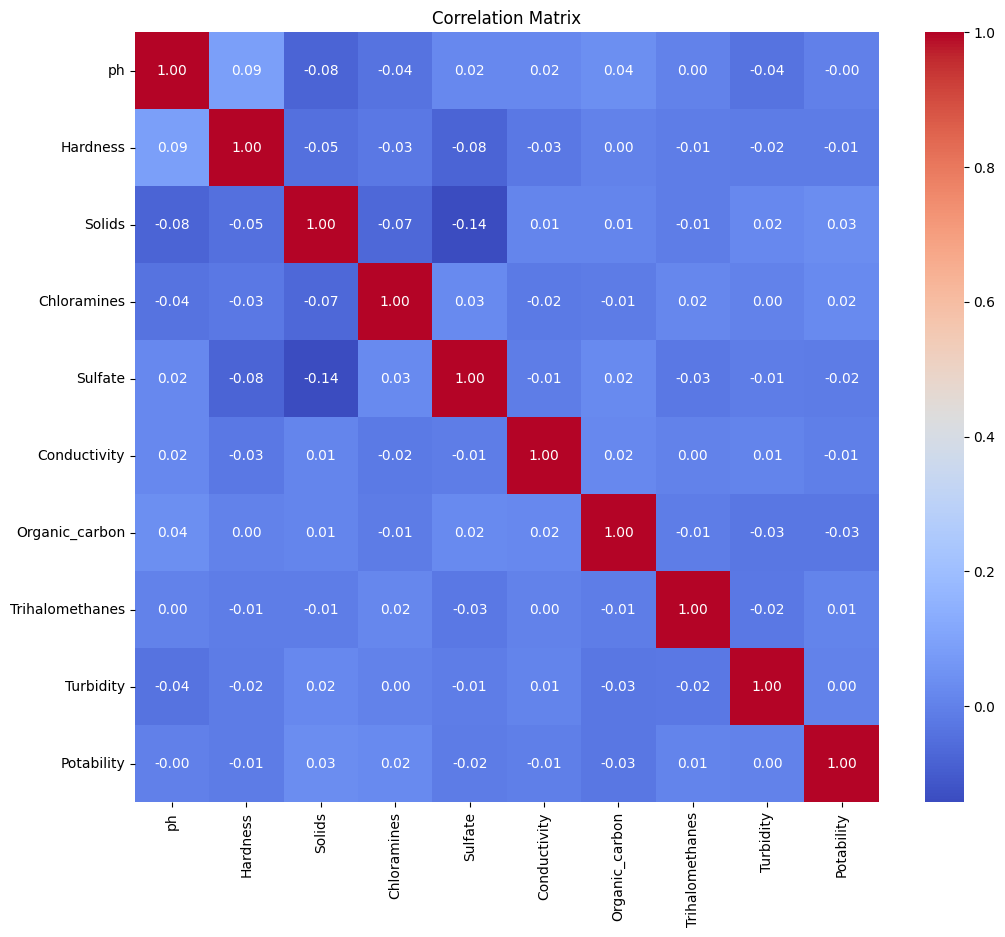

Highly Correlated Features:


In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Find highly correlated features
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i, j]) > 0.7:
      colname_i = correlation_matrix.columns[i]
      colname_j = correlation_matrix.columns[j]
      highly_correlated_features.append([colname_i, colname_j, correlation_matrix.iloc[i, j]])

print("Highly Correlated Features:")
for feature_pair in highly_correlated_features:
  print(f"{feature_pair[0]} and {feature_pair[1]}: Correlation = {feature_pair[2]}")

In [17]:
# Create interaction terms between features
df['ph_Hardness_interaction'] = df['ph'] * df['Hardness']
df['Solids_Chloramines_interaction'] = df['Solids'] * df['Chloramines']

# Create polynomial features
df['ph_squared'] = df['ph'] ** 2
df['Hardness_squared'] = df['Hardness'] ** 2

# Binning numerical features into categories
bins = [0, 5, 10, 15]
labels = ['low', 'medium', 'high']
df['ph_category'] = pd.cut(df['ph'], bins=bins, labels=labels, include_lowest=True)

# One-hot encoding categorical features
df = pd.get_dummies(df, columns=['ph_category'], prefix=['ph'])

In [18]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_Hardness_interaction,Solids_Chloramines_interaction,ph_squared,Hardness_squared,ph_low,ph_medium,ph_high
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0,1441.763344,151781.033682,49.515880,41980.098743,False,True,False
1,3.889107,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0.0,503.339581,123615.014718,15.125153,16750.292355,True,False,False
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0.0,1816.117313,184678.591692,65.595813,50281.900027,False,True,False
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0,1782.893330,177453.744580,69.168595,45955.952092,False,True,False
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0,1646.615390,117701.231503,82.668527,32797.756648,False,True,False


In [19]:
df.drop(['ph_low', 'ph_medium',	'ph_high', 'ph_low', 'ph_medium',	'ph_high'], axis=1, inplace=True)

In [20]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_Hardness_interaction,Solids_Chloramines_interaction,ph_squared,Hardness_squared
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0,1441.763344,151781.033682,49.515880,41980.098743
1,3.889107,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0.0,503.339581,123615.014718,15.125153,16750.292355
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0.0,1816.117313,184678.591692,65.595813,50281.900027
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0,1782.893330,177453.744580,69.168595,45955.952092
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0,1646.615390,117701.231503,82.668527,32797.756648


In [21]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


###Handling Class Imbalance - SMOTE


In [22]:
target_counts = df['Potability'].value_counts()
print(target_counts)

# Calculate the percentage of each class
target_percentages = df['Potability'].value_counts(normalize=True) * 100
print(target_percentages)

# Check if the data is balanced
if target_counts.min() / target_counts.max() < 0.3:
  print("The data is imbalanced.")
else:
  print("The data is relatively balanced.")

Potability
0.0    1998
1.0    1278
Name: count, dtype: int64
Potability
0.0    60.989011
1.0    39.010989
Name: proportion, dtype: float64
The data is relatively balanced.


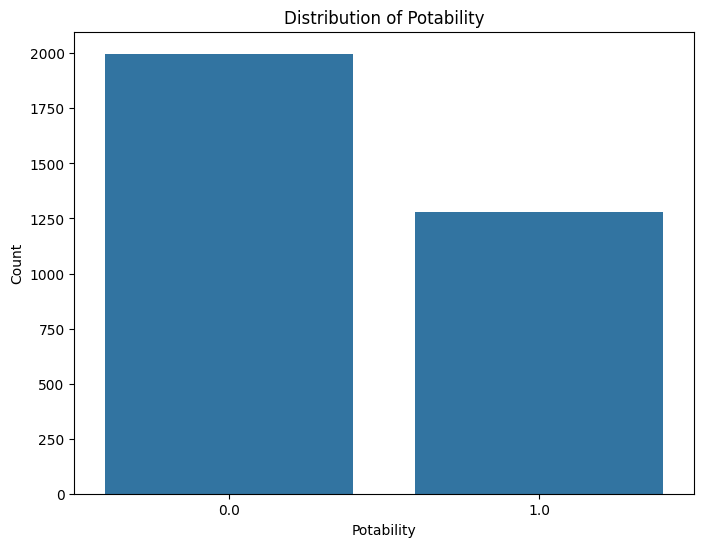

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts of the 'Potability' column
target_counts = df['Potability'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=df)
plt.title('Distribution of Potability')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Potability'] = y_resampled

# Check the value counts of the target variable after SMOTE
target_counts_resampled = df_resampled['Potability'].value_counts()
print(target_counts_resampled)

# Calculate the percentage of each class after SMOTE
target_percentages_resampled = df_resampled['Potability'].value_counts(normalize=True) * 100
print(target_percentages_resampled)

Potability
0.0    1998
1.0    1998
Name: count, dtype: int64
Potability
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


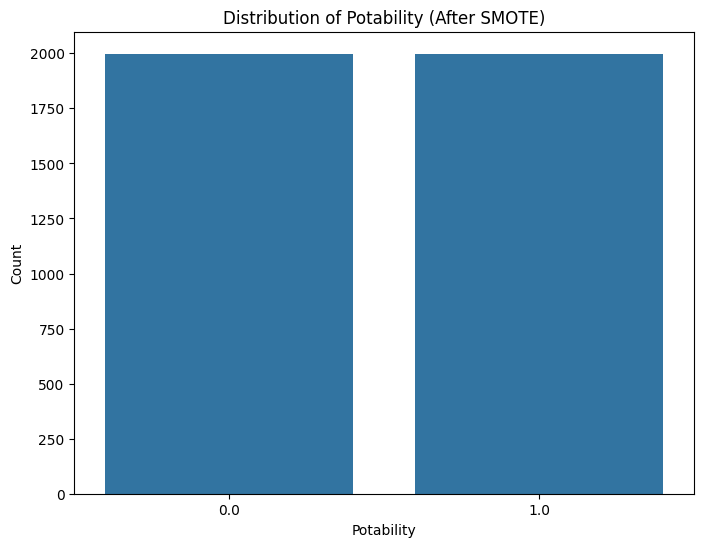

In [25]:
# Visualize the distribution of the target variable after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=df_resampled)
plt.title('Distribution of Potability (After SMOTE)')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

###Model Selection and Training

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Assuming df_resampled is your balanced DataFrame with features and target
X = df_resampled.drop('Potability', axis=1)
y = df_resampled['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary of classifiers
classifiers = {
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

results = {}

for name, classifier in classifiers.items():
  cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
  classifier.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = classifier.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  results[name] = {
      'CV Scores': cv_scores,
      'Mean CV Score': cv_scores.mean(),
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1 Score': f1,
      'Confusion Matrix': confusion_matrix(y_test, y_pred),
      'ROC Curve': roc_curve(y_test, y_pred),
      'AUC Score': roc_auc_score(y_test, y_pred) # Changed auc_score to roc_auc_score
  }

for name, result in results.items():
  print(f"Classifier: {name}")
  print(f"  Mean CV Score: {result['Mean CV Score']:.4f}")
  print(f"  Accuracy: {result['Accuracy']:.4f}")
  print(f"  Precision: {result['Precision']:.4f}")
  print(f"  Recall: {result['Recall']:.4f}")
  print(f"  F1 Score: {result['F1 Score']:.4f}")
  print(f"  Confusion Matrix:\n{result['Confusion Matrix']}")
  print(f"  ROC Curve:\n{result['ROC Curve']}")
  print(f"  AUC Score: {result['AUC Score']:.4f}")
  print("-" * 30)

Classifier: SVC
  Mean CV Score: 0.5175
  Accuracy: 0.5125
  Precision: 0.5563
  Recall: 0.1946
  F1 Score: 0.2883
  Confusion Matrix:
[[331  63]
 [327  79]]
  ROC Curve:
(array([0.        , 0.15989848, 1.        ]), array([0.        , 0.19458128, 1.        ]), array([inf,  1.,  0.]))
  AUC Score: 0.5173
------------------------------
Classifier: Random Forest
  Mean CV Score: 0.6859
  Accuracy: 0.7025
  Precision: 0.7199
  Recall: 0.6773
  F1 Score: 0.6980
  Confusion Matrix:
[[287 107]
 [131 275]]
  ROC Curve:
(array([0.       , 0.2715736, 1.       ]), array([0.       , 0.6773399, 1.       ]), array([inf,  1.,  0.]))
  AUC Score: 0.7029
------------------------------
Classifier: KNN
  Mean CV Score: 0.5720
  Accuracy: 0.6088
  Precision: 0.6143
  Recall: 0.6158
  F1 Score: 0.6150
  Confusion Matrix:
[[237 157]
 [156 250]]
  ROC Curve:
(array([0.        , 0.39847716, 1.        ]), array([0.        , 0.61576355, 1.        ]), array([inf,  1.,  0.]))
  AUC Score: 0.6086
----------------

### HYPERPARAMETER TUNING - GRIDSEARCH CV

In [27]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train a new Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model with the best parameters
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
roc_curve_result = roc_curve(y_test, y_pred)
roc_auc_score_result = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"ROC Curve:\n{roc_curve(y_test, y_pred)}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.6964959898278561
Accuracy: 0.7250
Precision: 0.7422
Recall: 0.7020
F1 Score: 0.7215
Confusion Matrix:
[[295  99]
 [121 285]]
ROC Curve:
(array([0.        , 0.25126904, 1.        ]), array([0.        , 0.70197044, 1.        ]), array([inf,  1.,  0.]))
AUC Score: 0.7253507039083793


In [28]:
rf_classifier = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    random_state=42
)

rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
roc_curve_result = roc_curve(y_test, y_pred)
roc_auc_score_result = roc_auc_score(y_test, y_pred)

print(f"Random Forest Classifier:")
print("Train Accuracy: ", rf_classifier.score(X_train, y_train))
print("Test Accuracy: ", rf_classifier.score(X_test, y_test))
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"  ROC Curve:\n{roc_curve(y_test, y_pred)}")
print(f"  AUC Score: {roc_auc_score(y_test, y_pred)}")

Random Forest Classifier:
Train Accuracy:  1.0
Test Accuracy:  0.72875
  Precision: 0.7392
  Recall: 0.7192
  F1 Score: 0.7291
  Confusion Matrix:
[[291 103]
 [114 292]]
  ROC Curve:
(array([0.        , 0.26142132, 1.        ]), array([0.        , 0.71921182, 1.        ]), array([inf,  1.,  0.]))
  AUC Score: 0.7288952514315721


### FEATURE IMPORTANCE

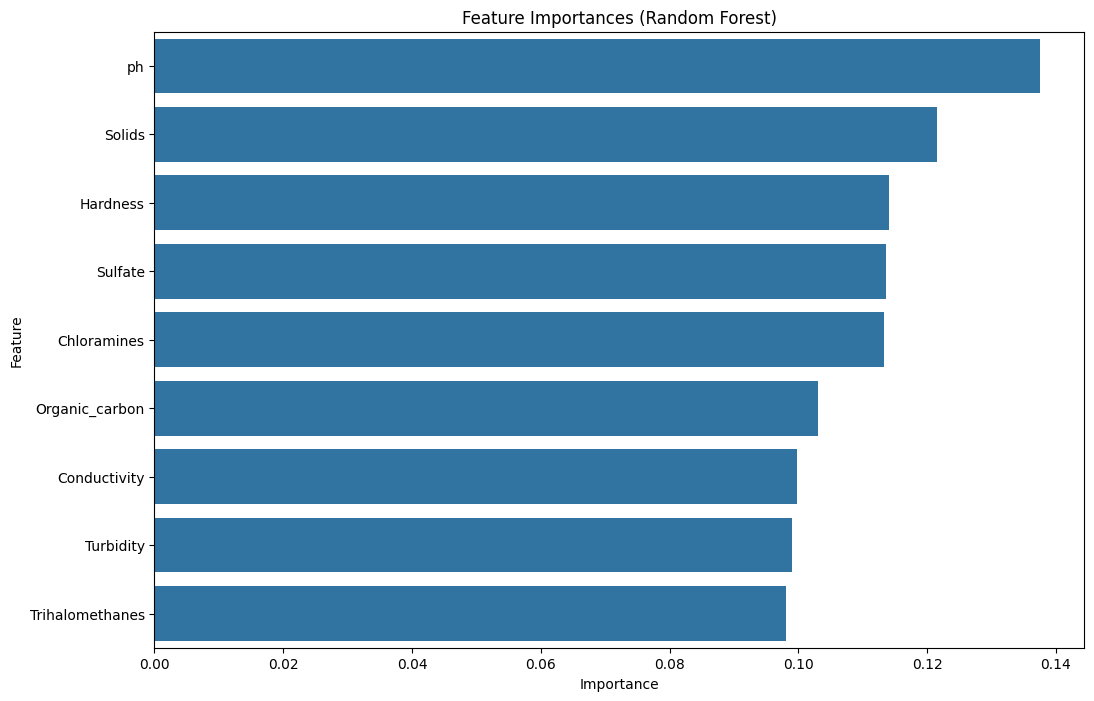

Top 10 Most Important Features:
           Feature  Importance
0               ph    0.137553
2           Solids    0.121568
1         Hardness    0.114071
4          Sulfate    0.113662
3      Chloramines    0.113270
6   Organic_carbon    0.103013
5     Conductivity    0.099874
8        Turbidity    0.098959
7  Trihalomethanes    0.098030


In [29]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Visualize feature importances using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

### RESULTS AND VISUALIZATION

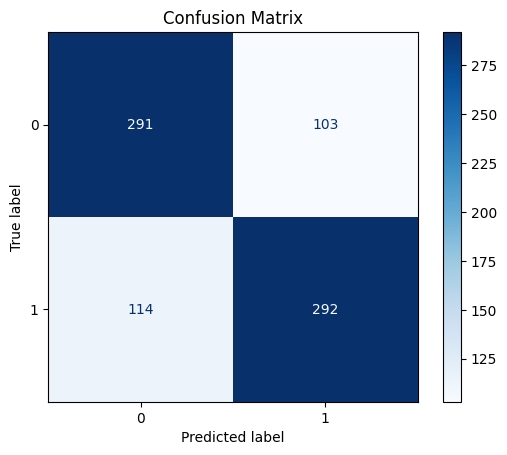

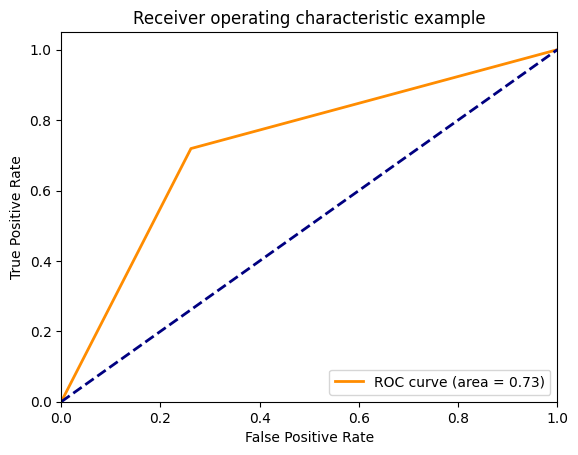

Model Performance Summary:
Accuracy: 0.7288
Precision: 0.7392
Recall: 0.7192
F1 Score: 0.7291
AUC Score: 0.7289
Confusion Matrix:
[[291 103]
 [114 292]]
ROC Curve:
(array([0.        , 0.26142132, 1.        ]), array([0.        , 0.71921182, 1.        ]), array([inf,  1.,  0.]))


In [30]:
# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Summarize findings
print("Model Performance Summary:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {roc_auc_score_result:.4f}")
print("Confusion Matrix:")
print(confusion_matrix_result)
print("ROC Curve:")
print(roc_curve_result)